# Bay Wheels's trip data Analysis and Visualization
## by Jasmin Cabaravdic

## Introduction

> Bay Wheels's trip data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.( source: Wikipedia)

### Dataset <b>
    
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. All data is available <a href="https://s3.amazonaws.com/baywheels-data/index.html">here</a> as monthly datasets. Data for 2019 year will be downloaded and merged to one dataset.

> Each trip contains:
> - Trip Duration (seconds)
> - Start Time and Date
> - End Time and Date
> - Start Station ID
> - Start Station Name
> - Start Station Latitude
> - Start Station Longitude
> - End Station ID
> - End Station Name
> - End Station Latitude
> - End Station Longitude
> - Bike ID
> - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

### Goal<b>
    
> Main goal of this project is to use data visualization in and after wrangling process to understand the patterns and relationships present in dataset. Main features for investigation are user type and time users ride a bike, as well as relation 
of these features with duration of ride.

In [1]:
# import all packages and set plots to be embedded inline
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

%matplotlib inline

### Gather data

In [2]:
# list all files in data directory
os.listdir("data/")

['201901-fordgobike-tripdata.csv.zip',
 '201902-fordgobike-tripdata.csv.zip',
 '201903-fordgobike-tripdata.csv.zip',
 '201904-fordgobike-tripdata.csv.zip',
 '201905-baywheels-tripdata.csv.zip',
 '201906-baywheels-tripdata.csv.zip',
 '201907-baywheels-tripdata.csv.zip',
 '201908-baywheels-tripdata.csv.zip',
 '201909-baywheels-tripdata.csv.zip',
 '201910-baywheels-tripdata.csv.zip',
 '201911-baywheels-tripdata.csv.zip',
 '201912-baywheels-tripdata.csv.zip']

In [3]:
# unzip all files
zip_files = os.listdir("data/")
for i in zip_files:
        with zipfile.ZipFile(os.path.join('data/', i), 'r') as myzip:
            myzip.extractall('data/')

In [4]:
# load all files to one dataframe
filenames = glob.glob("data/*.csv")
dfs = []

for i in filenames:
    dfs.append(pd.read_csv(i))
    
df = pd.concat(dfs, ignore_index = True)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# save dataframe to working directory
df.to_csv("baywheel_bike_2019.csv", index = False)

### Asses data

In [6]:
df_all = pd.read_csv("baywheel_bike_2019.csv")

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [8]:
df_all.sample(8)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
2121049,764,2019-10-07 15:47:43.2310,2019-10-07 16:00:28.0720,350.0,8th St at Brannan St,37.771431,-122.405787,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,10140,Subscriber,No,NaN
2413897,579,2019-12-13 14:44:36.5230,2019-12-13 14:54:15.7580,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,928,Subscriber,NaN,NaN
1738961,282,2019-09-26 21:35:16.9100,2019-09-26 21:39:59.7610,176.0,MacArthur BART Station,37.828410,-122.266315,175.0,49th St at Telegraph Ave,37.835946,-122.262366,3001,Subscriber,No,NaN
309414,256,2019-02-11 22:33:04.0070,2019-02-11 22:37:20.2570,267.0,Derby St at College Ave,37.861804,-122.253569,253.0,Haste St at College Ave,37.866418,-122.253799,5115,Subscriber,No,NaN
2209521,226,2019-11-21 12:46:51.3930,2019-11-21 12:50:38.2910,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,9934,Subscriber,No,NaN
979499,695,2019-05-12 22:49:25.4170,2019-05-12 23:01:00.8440,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,11.0,Davis St at Jackson St,37.797280,-122.398436,2299,Subscriber,No,NaN
1425479,376,2019-07-28 21:45:55,2019-07-28 21:52:12,NaN,NaN,37.343064,-121.889489,NaN,NaN,37.340477,-121.895644,953646,Customer,NaN,clipper
1451785,942,2019-07-22 07:39:35,2019-07-22 07:55:18,81.0,Berry St at 4th St,37.775880,-122.393170,390.0,Indiana St at Cesar Chavez St,37.750434,-122.390447,741519,Subscriber,NaN,app


In [9]:
df_all.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [10]:
df_all.bike_share_for_all_trip.unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df_all.rental_access_method.unique()

array([nan, 'app', 'clipper'], dtype=object)

In [12]:
df_all.duplicated().sum()

0

### Data quality issues

- drop rental_access_method since there is to many missing values
- create new columns with day and month
- convert start_time and end_time to datetime
- missing values for start and end station id and station name
- calculate seconds to minutes
- drop records that are missing start and end station name
- divide das of week to workdays(Monday to Friday) and weekend(Saturday, Sunday)

### Clean data

In [13]:
# making copy dataset before cleaning process
df_all_clean= df_all.copy()

In [14]:
df_all_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


#### Define:<b>
Drop drop rental_access_method column

#### Code

In [15]:
df_all_clean.drop("rental_access_method", axis=1, inplace = True)

#### Test

In [16]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 267.8+ MB


#### Define: <b>
Change start_time and end_time column datatype to datetime

#### Code

In [17]:
df_all_clean["start_time"] = pd.to_datetime(df_all_clean["start_time"])
df_all_clean["end_time"] = pd.to_datetime(df_all_clean["end_time"])

#### Test

In [18]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 267.8+ MB


#### Define :<b>
Create new columns with day and month, we'll take these values from start_time

#### Code

In [19]:
df_all_clean["day"] = df_all_clean["start_time"].dt.strftime("%A")
df_all_clean["month"] = df_all_clean["start_time"].dt.strftime("%B")

#### Test

In [20]:
df_all_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,day,month
2157260,679,2019-10-02 16:05:35.113,2019-10-02 16:16:54.153,47.0,4th St at Harrison St,37.780955,-122.399749,116.0,Mississippi St at 17th St,37.764802,-122.394771,785,Subscriber,No,Wednesday,October
728469,280,2019-04-16 06:53:22.653,2019-04-16 06:58:02.711,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,163.0,Lake Merritt BART Station,37.797320,-122.265320,2750,Subscriber,No,Tuesday,April
1985809,447,2019-10-24 17:23:59.621,2019-10-24 17:31:26.951,66.0,3rd St at Townsend St,37.778742,-122.392741,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,9722,Subscriber,Yes,Thursday,October
952234,790,2019-05-17 15:16:24.641,2019-05-17 15:29:34.752,174.0,Shattuck Ave at 51st St,37.836801,-122.264004,211.0,Broadway at 40th St,37.827757,-122.256716,2476,Subscriber,No,Friday,May
2024268,683,2019-10-19 22:58:23.410,2019-10-19 23:09:47.105,218.0,DeFremery Park,37.812331,-122.285171,160.0,West Oakland BART Station,37.805318,-122.294837,9509,Customer,No,Saturday,October


#### Define:<b>
Calculate seconds to minutes and delete duration_sec column

#### Code

In [21]:
df_all_clean["duration_min"] = df_all_clean.duration_sec / 60
df_all_clean["duration_min"] = df_all_clean["duration_min"].astype(int)

In [22]:
df_all_clean.drop("duration_sec", axis=1, inplace=True)

#### Test

In [23]:
df_all_clean.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,day,month,duration_min
0,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,Thursday,January,1347
1,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,Thursday,January,1098
2,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,Thursday,January,1043
3,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,Thursday,January,744
4,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,Thursday,January,1011


#### Define:<b>
Drop all record that have missing station information

#### Code

In [24]:
df_all_clean.isnull().sum()

start_time                      0
end_time                        0
start_station_id            80734
start_station_name          80133
start_station_latitude          0
start_station_longitude         0
end_station_id              82902
end_station_name            82350
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip    243259
day                             0
month                           0
duration_min                    0
dtype: int64

In [25]:
df_all_clean=df_all_clean[df_all_clean.start_station_id.notnull()]
df_all_clean=df_all_clean[df_all_clean.end_station_id.notnull()]

#### Test

In [26]:
df_all_clean.isnull().sum()

start_time                      0
end_time                        0
start_station_id                0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip    144280
day                             0
month                           0
duration_min                    0
dtype: int64

In [27]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         float64       
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           float64       
 7   end_station_name         object        
 8   end_station_latitude     float64       
 9   end_station_longitude    float64       
 10  bike_id                  int64         
 11  user_type                object        
 12  bike_share_for_all_trip  object        
 13  day                      object        
 14  month                    object        
 15  duration_min             int32         
dtypes: datetime64[ns](2), float64(6), int32(1), int64(1), object(6)
memory u

#### Define<b>
Create new column week with two categories, workweek and weekend

#### Code

In [28]:
df_all_clean["week"]=df_all_clean["day"]

In [29]:
df_all_clean["week"].replace({"Monday":"workweek","Tuesday":"workweek","Wednesday":"workweek","Thursday":"workweek",
                   "Friday":"workweek","Saturday":"weekend","Sunday":"weekend"}, inplace=True)

#### Test

In [30]:
df_all_clean.sample(8)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,day,month,duration_min,week
129037,2019-01-13 07:16:38.585,2019-01-13 07:18:28.834,277.0,Morrison Ave at Julian St,37.333658,-121.908586,276.0,Julian St at The Alameda,37.332233,-121.912516,3777,Subscriber,Yes,Sunday,January,1,weekend
2377674,2019-12-20 15:05:07.076,2019-12-20 15:25:51.422,439.0,Post St at Divisadero St,37.784372,-122.439478,63.0,Bryant St at 6th St,37.775910,-122.402575,13046,Subscriber,NaN,Friday,December,20,workweek
1776833,2019-09-22 17:18:25.616,2019-09-22 17:21:50.666,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,274.0,Oregon St at Adeline St,37.857567,-122.267558,2072,Subscriber,No,Sunday,September,3,weekend
608131,2019-03-04 18:57:38.463,2019-03-04 19:01:01.731,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,5060,Subscriber,No,Monday,March,3,workweek
1946906,2019-10-30 08:32:17.960,2019-10-30 08:35:52.154,90.0,Townsend St at 7th St,37.771058,-122.402717,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,11181,Subscriber,No,Wednesday,October,3,workweek
1407529,2019-07-02 07:56:36.212,2019-07-02 08:01:54.778,356.0,Valencia St at Clinton Park,37.769188,-122.422285,58.0,Market St at 10th St,37.776619,-122.417385,3222,Subscriber,No,Tuesday,July,5,workweek
1062176,2019-06-28 19:18:28.207,2019-06-28 19:24:20.858,243.0,Bancroft Way at College Ave,37.869360,-122.254337,249.0,Russell St at College Ave,37.858473,-122.253253,1209,Customer,No,Friday,June,5,workweek
1304451,2019-07-19 21:10:34.420,2019-07-19 21:24:24.257,323.0,Broadway at Kearny,37.798014,-122.405950,22.0,Howard St at Beale St,37.789756,-122.394643,2413,Subscriber,No,Friday,July,13,workweek


In [46]:
# create csv file for slide deck creation
df_all_clean.to_csv("baywheel_bike_slide.csv", index = False)

## Data Analsing and Visualization

### Univariate Exploration

> In this section, investigating  distributions of individual variables. 

In [31]:
df_all_clean.sample(8)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,day,month,duration_min,week
124513,2019-01-14 07:58:40.748,2019-01-14 08:13:01.814,241.0,Ashby BART Station,37.852477,-122.270213,243.0,Bancroft Way at College Ave,37.869360,-122.254337,4519,Subscriber,No,Monday,January,14,workweek
589290,2019-03-07 09:34:21.738,2019-03-07 09:50:41.855,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,77.0,11th St at Natoma St,37.773507,-122.416040,3531,Customer,No,Thursday,March,16,workweek
2477509,2019-12-02 08:23:09.547,2019-12-02 08:37:54.979,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,80.0,Townsend St at 5th St,37.775235,-122.397437,11729,Customer,NaN,Monday,December,14,workweek
770705,2019-04-11 06:51:40.801,2019-04-11 07:07:48.908,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,126.0,Esprit Park,37.761634,-122.390648,6771,Subscriber,No,Thursday,April,16,workweek
2117187,2019-10-07 21:27:32.317,2019-10-07 21:34:55.373,126.0,Esprit Park,37.761634,-122.390648,81.0,Berry St at 4th St,37.775880,-122.393170,10729,Subscriber,No,Monday,October,7,workweek
1565203,2019-08-22 18:15:05.623,2019-08-22 18:29:59.249,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,123.0,Folsom St at 19th St,37.760594,-122.414817,809,Customer,No,Thursday,August,14,workweek
258622,2019-02-20 08:42:46.395,2019-02-20 08:48:39.009,61.0,Howard St at 8th St,37.776513,-122.411306,114.0,Rhode Island St at 17th St,37.764478,-122.402570,5973,Subscriber,No,Wednesday,February,5,workweek
2467398,2019-12-03 20:57:33.675,2019-12-03 21:03:40.619,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,3144,Subscriber,NaN,Tuesday,December,6,workweek


In [32]:
df_all_clean.describe()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,duration_min
count,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06
mean,1.462493e+02,3.776938e+01,-1.223547e+02,1.424856e+02,3.776852e+01,-1.223505e+02,9.290408e+03,1.292218e+01
std,1.221971e+02,1.034811e-01,1.607865e-01,1.213367e+02,2.244698e-01,6.650935e-01,5.046242e+04,3.184651e+01
min,3.000000e+00,0.000000e+00,-1.224952e+02,3.000000e+00,0.000000e+00,-1.224952e+02,4.000000e+00,1.000000e+00
25%,4.700000e+01,3.777003e+01,-1.224130e+02,4.200000e+01,3.777041e+01,-1.224116e+02,1.877000e+03,5.000000e+00
50%,1.040000e+02,3.778053e+01,-1.223984e+02,1.010000e+02,3.778076e+01,-1.223981e+02,3.727000e+03,9.000000e+00
75%,2.420000e+02,3.779539e+01,-1.222948e+02,2.390000e+02,3.779625e+01,-1.222948e+02,7.171000e+03,1.400000e+01
max,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.984300e+05,1.437000e+03


First we will calculate avarage bike ride duration and maximum duration of ride. Also, let's check distribution of bike usage duration in minutes. 

In [33]:
avg = df_all_clean.duration_min.mean()
print("Avarege bike ride duration is {0:.2f}".format(avg),"minutes")

Avarege bike ride duration is 12.92 minutes


In [34]:
max_dur=df_all_clean.duration_min.max()
print("Maximum bike ride duration is {0:.0f}".format(max_dur),"minutes")

Maximum bike ride duration is 1437 minutes


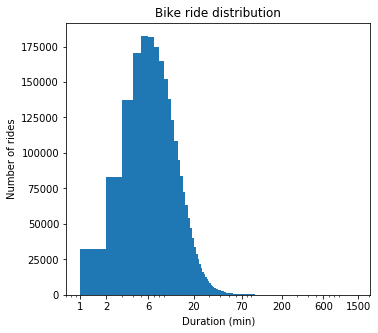

In [35]:
# plotting distribution of bike ride duration
plt.figure(figsize =(12,5))

base_color = sns.color_palette()[0]

plt.subplot(1,2,1)
bin_edges = np.arange(0, df_all_clean.duration_min.max()+1, 1)
plt.hist(data=df_all_clean, x= "duration_min", color = base_color, bins=bin_edges);
plt.xscale("log")
tick_locs = [1,2,6,20,70, 200, 600,1500]
plt.xticks(tick_locs, tick_locs);
plt.title("Bike ride distribution")
plt.xlabel("Duration (min)")
plt.ylabel("Number of rides");


Since there are some outliers on duration distribution we should limit x axis values to 60 minutes

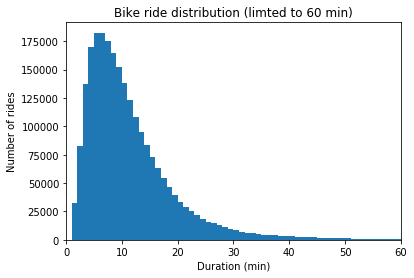

In [36]:
# plotting distribution of bike ride duration with limit on x axis
bin_size = np.arange(0, df_all_clean["duration_min"].max() + 1 , 1)

# duration distribution in min
plt.hist(data = df_all_clean, x="duration_min", bins = bin_size, color = base_color)
plt.xlim(0, 60)
plt.title("Bike ride distribution (limted to 60 min)")
plt.xlabel("Duration (min)")
plt.ylabel("Number of rides");

Comment: As we can see from above graph, distribution is right skewed. 75% of results are below 14 minutes



Distribution  of bike rides by day of the week

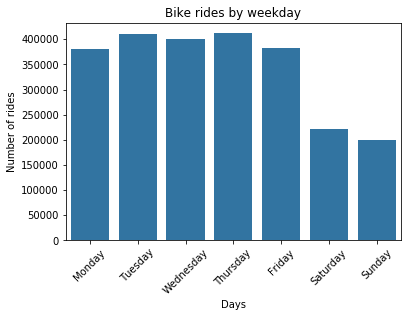

In [37]:
# plotting distribution of rides by day of the week
sns.countplot(data=df_all_clean, x= "day",order = ["Monday","Tuesday","Wednesday","Thursday","Friday",
                                                  "Saturday","Sunday"], color=base_color)
plt.xticks(rotation=45)
plt.title("Bike rides by weekday")
plt.xlabel("Days")
plt.ylabel("Number of rides");

Comment: It looks like mostly peoply use bikes on working days. We can assume the purpose of bike sharing service  is to get to the work

Bike ride distribution by month

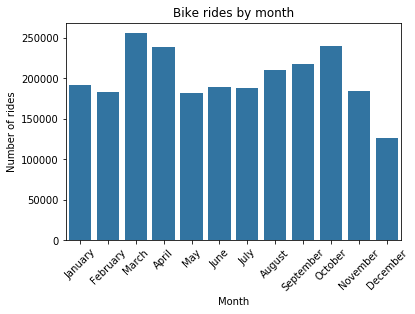

In [38]:
# plotting distribution of bike rides by month
sns.countplot(data=df_all_clean, x= "month", color=base_color)
plt.xticks(rotation=45)
plt.title("Bike rides by month")
plt.xlabel("Month")
plt.ylabel("Number of rides");

Comment: Highest bike rides numbers are in March,April and October, and as we would expect least usage is in December 

There are two types of users, Subscriber(member users) and Customer(casual users). Let's see the difference in ride duration between these two groups of users 

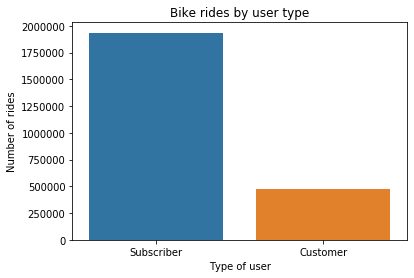

In [39]:
# using seaborn countplot for ploting distribution
sns.countplot(data=df_all_clean, x="user_type")
plt.title("Bike rides by user type")
plt.xlabel("Type of user")
plt.ylabel("Number of rides");

Comment: Most of Bay Wheels users come from Subscriber group. These are regular customers

Bay Wheels users have option to share their trip. Checking if bike riders use this option 

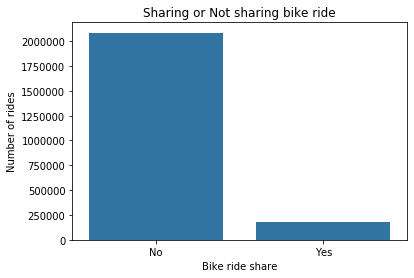

In [40]:
# using seaborn countplot for ploting distribution
sns.countplot(data=df_all_clean, x="bike_share_for_all_trip", color=base_color)
plt.title("Sharing or Not sharing bike ride")
plt.xlabel("Bike ride share")
plt.ylabel("Number of rides");

Comment: Majority of users do not share their rides

## Bivariate Exploration

> In this section, investigating relationships between pairs of variables dataset. 

Let's check if there is difference in bike ride duration between two user types, Subscribers and Customers

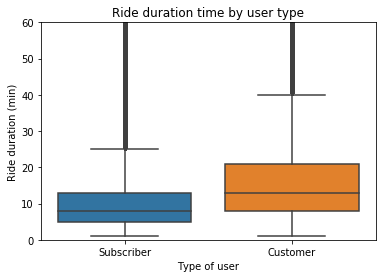

In [41]:
# we will use seaborn boxplot for plottting data for two categorical variables
sns.boxplot(data=df_all_clean, x = "user_type",y="duration_min")
#limiting y axis for ride duration to 60 minutes
plt.ylim(0,60)
plt.title("Ride duration time by user type")
plt.xlabel("Type of user")
plt.ylabel("Ride duration (min)");

Comment: Subscribers ride bikes for shorter period of time then Customers type of users

Let's see distribution of riding time comparing workdays and weekend

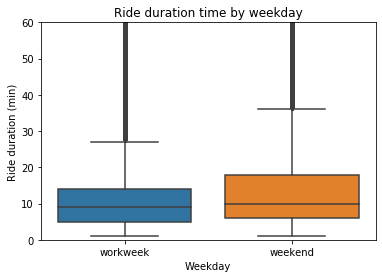

In [42]:
# using seaborn boxplot for ploting distribution
sns.boxplot(data=df_all_clean, x="week", y="duration_min")
#limiting y axis for ride duration to 60 minutes
plt.ylim(0,60)

plt.title("Ride duration time by weekday")
plt.xlabel("Weekday")
plt.ylabel("Ride duration (min)");

Comment: From above chart we can see that there is a slight difference in  ride duration comparing workdays and weekend. Users tend to ride bike for 
longer time period during weekend

## Multivariate Exploration



In [43]:
df_all_clean.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,day,month,duration_min,week
0,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,Thursday,January,1347,workweek
1,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,Thursday,January,1098,workweek
2,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,Thursday,January,1043,workweek
3,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,Thursday,January,744,workweek
4,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,Thursday,January,1011,workweek


Let's analyse distribution of riding duration comparing user types by day of the week.

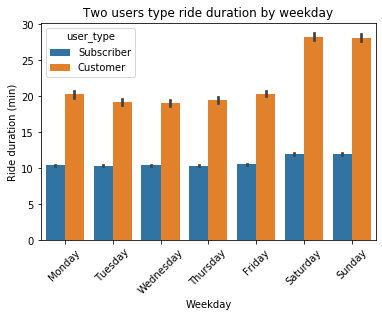

In [44]:
# using seaborn barplot with three variables day, duration and user type
sns.barplot(data = df_all_clean, x="day", y="duration_min",hue= "user_type",order = ["Monday","Tuesday","Wednesday","Thursday",
                                                                                "Friday","Saturday","Sunday"],  dodge = 0.3)
plt.xticks(rotation=45)
plt.title("Two users type ride duration by weekday")
plt.xlabel("Weekday")
plt.ylabel("Ride duration (min)");

Comment: On weekend both type of users ride bike for longer time

Analysing distribution of ride duration between two types of users compering the mont of the year 

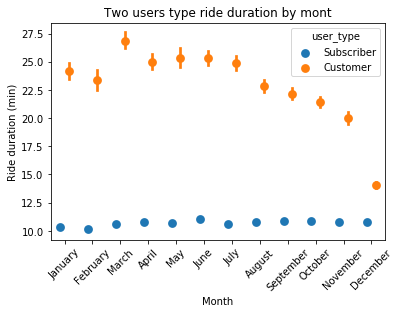

In [45]:
# using seaborn pointplot
ax = sns.pointplot(data = df_all_clean, x = "month", y = "duration_min", hue="user_type",
                  dodge = 0.3, linestyles = "")
plt.xticks(rotation=45)
plt.title("Two users type ride duration by month")
plt.xlabel("Month")
plt.ylabel("Ride duration (min)");

Comment: 
In December, both type of users, Subscribers and Customers ride bike for shorter time period, while during the rest of the year
Customers tend to ride bike longer